In [16]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm
from datetime import datetime, timedelta
import random

In [5]:
def generate_ar_eyepiece_data(sample_size=50):
  """
  Generates sample data for AR eyepiece manufacturing with multiple measurements and quality attributes, 
  including a timestamp for each measurement.

  Args:
    sample_size: Number of samples to generate.

  Returns:
    pandas.DataFrame: DataFrame containing sample data with columns:
      - 'Timestamp': Timestamp for each measurement.
      - 'Sample_ID': Unique sample identifier.
      - 'Focal_Length': Simulated focal length measurement.
      - 'Curvature': Simulated curvature measurement.
      - 'Angle': Simulated angle measurement.
      - 'Clarity': Simulated clarity score (0-10).
      - 'Distortion': Simulated distortion score (0-10).
      - 'Durability': Simulated durability score (0-10). 
  """

  # Define base values and introduce variations
  base_focal_length = 50.0
  base_curvature = 2.5 
  base_angle = 45.0
  base_clarity = 9.0 
  base_distortion = 1.0
  base_durability = 8.0

  focal_length_variation = np.random.normal(loc=0, scale=0.5, size=sample_size)
  curvature_variation = np.random.normal(loc=0, scale=0.05, size=sample_size)
  angle_variation = np.random.normal(loc=0, scale=0.2, size=sample_size)
  clarity_variation = np.random.normal(loc=0, scale=0.5, size=sample_size)
  distortion_variation = np.random.normal(loc=0, scale=0.2, size=sample_size)
  durability_variation = np.random.normal(loc=0, scale=0.3, size=sample_size)

  # Introduce outliers
  outlier_indices_focal_length = np.random.choice(sample_size, size=2, replace=False)
  outlier_indices_curvature = np.random.choice(sample_size, size=1, replace=False)
  outlier_indices_angle = np.random.choice(sample_size, size=3, replace=False)
  outlier_indices_clarity = np.random.choice(sample_size, size=1, replace=False)
  outlier_indices_distortion = np.random.choice(sample_size, size=2, replace=False)
  outlier_indices_durability = np.random.choice(sample_size, size=1, replace=False)

  focal_length_variation[outlier_indices_focal_length] += 3 
  curvature_variation[outlier_indices_curvature] -= 0.15
  angle_variation[outlier_indices_angle] += 0.5
  clarity_variation[outlier_indices_clarity] -= 1.0
  distortion_variation[outlier_indices_distortion] += 0.4
  durability_variation[outlier_indices_durability] -= 1.0

  # Generate timestamps with 1-second intervals
  start_time = datetime.now()
  timestamps = [start_time + timedelta(seconds=i) for i in range(sample_size)]

  # Create the DataFrame
  data = pd.DataFrame({
      'Timestamp': timestamps,
      'Sample_ID': range(1, sample_size + 1),
      'Focal_Length': base_focal_length + focal_length_variation,
      'Curvature': base_curvature + curvature_variation,
      'Angle': base_angle + angle_variation,
      'Clarity': base_clarity + clarity_variation,
      'Distortion': base_distortion + distortion_variation,
      'Durability': base_durability + durability_variation,
  })

  # Define control limits (example values - adjust based on your specific specifications)
  data['Focal_Length_UCL'] = base_focal_length + 3 * 0.5 
  data['Focal_Length_LCL'] = base_focal_length - 3 * 0.5
  data['Curvature_UCL'] = base_curvature + 3 * 0.05
  data['Curvature_LCL'] = base_curvature - 3 * 0.05
  data['Angle_UCL'] = base_angle + 3 * 0.2
  data['Angle_LCL'] = base_angle - 3 * 0.2
  data['Clarity_UCL'] = base_clarity - 1.0  # Assuming a lower limit for Clarity (e.g., 8.0)
  data['Clarity_LCL'] = base_clarity - 2.0  # Assuming a lower limit for Clarity (e.g., 7.0)
  data['Distortion_UCL'] = base_distortion + 0.3  # Assuming an upper limit for Distortion (e.g., 1.3)
  data['Distortion_LCL'] = base_distortion - 0.3  # Assuming a lower limit for Distortion (e.g., 0.7)
  data['Durability_UCL'] = base_durability - 1.0  # Assuming a lower limit for Durability (e.g., 7.0)
  data['Durability_LCL'] = base_durability - 2.0  # Assuming a lower limit for Durability (e.g., 6.0)

  return data


In [6]:
# Generate sample data
ar_eyepiece_df = generate_ar_eyepiece_data()
print(ar_eyepiece_df.head())

                   Timestamp  Sample_ID  Focal_Length  Curvature      Angle  \
0 2025-01-10 17:18:25.950865          1     49.576390   2.464635  44.822781   
1 2025-01-10 17:18:26.950865          2     48.757416   2.436292  45.435535   
2 2025-01-10 17:18:27.950865          3     50.010019   2.499856  44.986275   
3 2025-01-10 17:18:28.950865          4     49.254961   2.554841  44.899906   
4 2025-01-10 17:18:29.950865          5     49.846621   2.482063  44.859149   

    Clarity  Distortion  Durability  Focal_Length_UCL  Focal_Length_LCL  \
0  9.010960    0.659928    8.407258              51.5              48.5   
1  9.364441    1.107877    7.705109              51.5              48.5   
2  9.036728    1.157569    8.383680              51.5              48.5   
3  8.541178    0.689202    8.060591              51.5              48.5   
4  9.932793    1.120576    7.723174              51.5              48.5   

   Curvature_UCL  Curvature_LCL  Angle_UCL  Angle_LCL  Clarity_UCL  \
0   

In [7]:
def create_control_chart(df: pd.DataFrame, label: str, ts = 'Timestamp'): 
  
    # Calculate control limits (mean +/- 3 times standard deviation for simplicity)
    mean_value = df[label].mean()
    std_dev = df[label].std()
    upper_limit = mean_value + 3 * std_dev
    lower_limit = mean_value - 3 * std_dev

    # Create control chart
    plt.figure()
    plt.plot(df[ts], df[label], label=label)
    plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Control Limit')
    plt.axhline(y=lower_limit, color='g', linestyle='--', label='Lower Control Limit')

    # Customize the plot
    plt.title('Control Chart')
    plt.xlabel('Date')
    plt.ylabel(label)
    plt.legend()
    plt.grid(True)

    # Rotate the date labels vertically
    plt.xticks(rotation='vertical')

    # fig.show()
    img_name = 'control_chart.png'
    plt.savefig(img_name)    
    return img_name


In [8]:
def create_bell_curve_chart(df: pd.DataFrame, label: str, ts = 'Timestamp'):
    
    # Calculate mean and standard deviation
    mean_value = df[label].mean()
    std_dev = df[label].std()

    # Generate x values for the bell curve
    x_values = np.linspace(mean_value - 3 * std_dev, mean_value + 3 * std_dev, 1000)
    # Calculate corresponding y values using the normal distribution
    y_values = norm.pdf(x_values, mean_value, std_dev)

    # Create bell curve chart
    plt.figure()
    
    # Plot the bell curve
    plt.plot(x_values, y_values, label='Bell Curve')

    # Annotate mean, std
    plt.scatter([mean_value], [0], color='red', marker='o')
    plt.annotate('Mean', xy=(mean_value, 0), xytext=(mean_value, 0.02), ha='center', va='bottom', color='red')
    
    plt.scatter([mean_value + std_dev], [0], color='green', marker='o')
    plt.annotate('1 Std Dev', xy=(mean_value + std_dev, 0), xytext=(mean_value + std_dev, 0.02), ha='center', va='bottom', color='green')

    plt.scatter([mean_value - std_dev], [0], color='blue', marker='o')
    plt.annotate('-1 Std Dev', xy=(mean_value - std_dev, 0), xytext=(mean_value - std_dev, 0.02), ha='center', va='bottom', color='blue')

    # Customize plot
    plt.title('Bell Curve Chart with Mean and Std')
    plt.xlabel(label)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

    # Save the plot as an image
    img_name = 'bell_curve_chart.png'
    plt.savefig(img_name)

    return img_name

In [9]:
def create_histogram_bell_curve_chart(df: pd.DataFrame, label: str):
        
    data = df[label]

    plt.figure()    
    # Create histogram
    plt.hist(data, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogram')

    # Fit a normal distribution to the data
    mu, std = norm.fit(data)

    # Plot the bell curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
        
    plt.plot(x, p, 'k', linewidth=2, label=f'Fit results:\n$\mu={mu:.2f}$, $\sigma={std:.2f}$')

    # Customize the plot
    plt.title('Histogram with Bell Curve Overlay')
    plt.xlabel(label)
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    # plt.show()
    img_name = 'histogram_bell_curve_chart.png'
    plt.savefig(img_name)
    return img_name    

In [15]:
def create_box_plot(df: pd.DataFrame, labels: str):
    
    data = df[labels]

    plt.figure()
    # Create box plot
    plt.boxplot(data.values, tick_labels=[labels])

    # Customize the plot
    plt.title('Box Plot of AR Eyepiece Measurements')
    plt.xlabel('Measurements')
    plt.ylabel('Values')
    plt.grid(True) 

    # Show the plot
    # plt.show()
    img_name = 'box_plot.png'
    plt.savefig(img_name)
    return img_name



In [11]:
target_cols = ar_eyepiece_df.columns[~ar_eyepiece_df.columns.str.contains("Times|_ID|_LCL|_UCL")].to_list()
print(target_cols) 

['Focal_Length', 'Curvature', 'Angle', 'Clarity', 'Distortion', 'Durability']


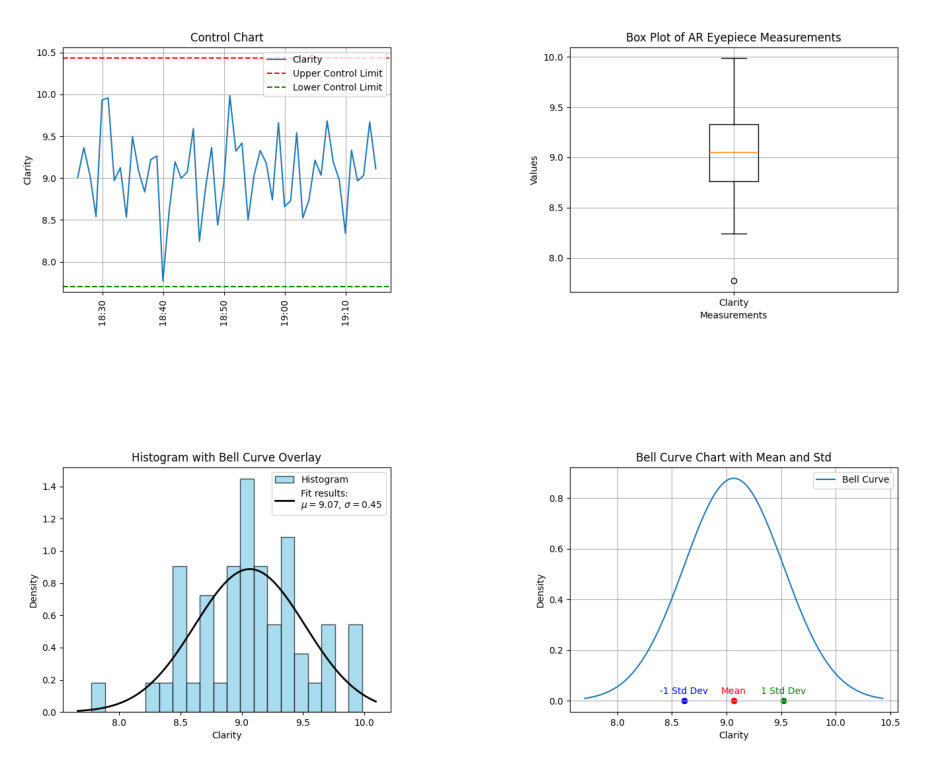

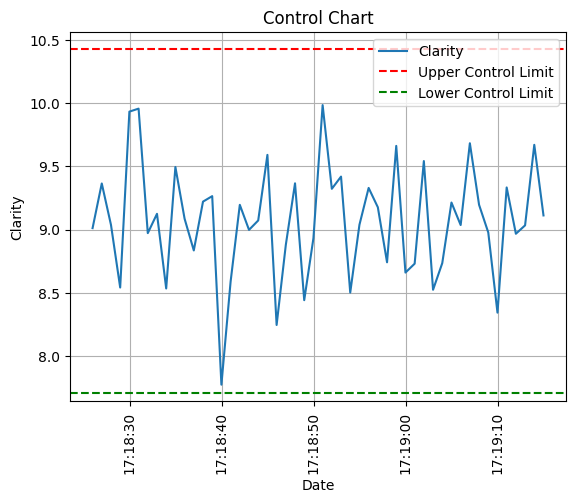

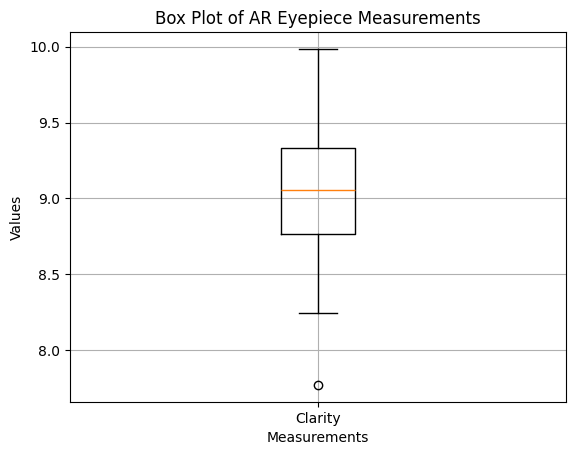

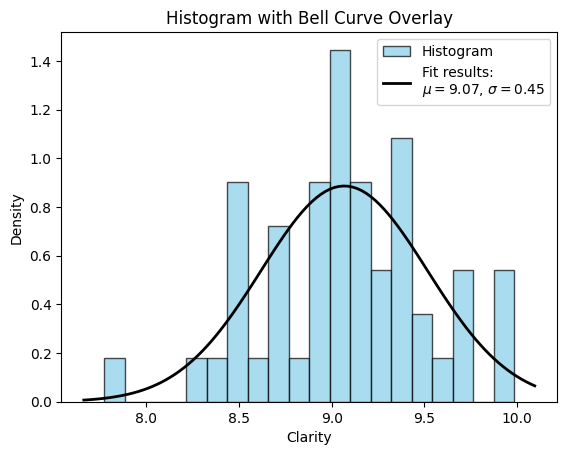

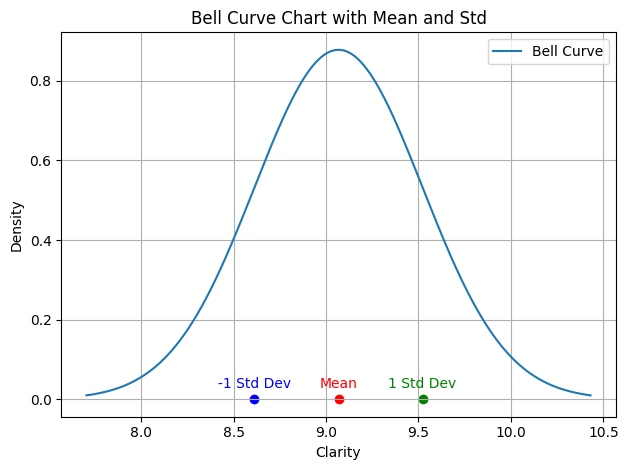

In [17]:
# Create subplots with a 2x2 grid layout
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Populate the subplots with saved images
# Cell 1: Control Chart 

label =  random.choice(target_cols)
control_chart_image = create_control_chart(ar_eyepiece_df, label)
axs[0, 0].imshow(plt.imread(control_chart_image))
axs[0, 0].axis('off')

# Cell 2: Box Plot
box_plot_image = create_box_plot(ar_eyepiece_df, label)
axs[0, 1].imshow(plt.imread(box_plot_image))
axs[0, 1].axis('off')

# Cell 3: Histogram Bell Curve Overlay
histogram_image = create_histogram_bell_curve_chart(ar_eyepiece_df, label)
axs[1, 0].imshow(plt.imread(histogram_image))
axs[1, 0].axis('off')

# Cell 4: Bell Curve
bell_curve = create_bell_curve_chart(ar_eyepiece_df, label)
axs[1, 1].imshow(plt.imread(bell_curve))
axs[1, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
# plt.show()
# plt.savefig('manufacturing.png')
